In [25]:
import pandas as pd

diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


In [26]:
features = ['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure', 'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age']
labels = 'Diabetic'

x, y = diabetes[features].values, diabetes[labels].values
for i in range (0, 4):
    print('Patient', str(i+1), "\nFeatures", list(x[i]), "\nLabels", y[i])

Patient 1 
Features [0.0, 171.0, 80.0, 34.0, 23.0, 43.50972593, 1.213191354, 21.0] 
Labels 0
Patient 2 
Features [8.0, 92.0, 93.0, 47.0, 36.0, 21.24057571, 0.158364981, 23.0] 
Labels 0
Patient 3 
Features [7.0, 115.0, 47.0, 52.0, 35.0, 41.51152348, 0.079018568, 23.0] 
Labels 0
Patient 4 
Features [9.0, 103.0, 78.0, 25.0, 304.0, 29.58219193, 1.282869847, 43.0] 
Labels 1


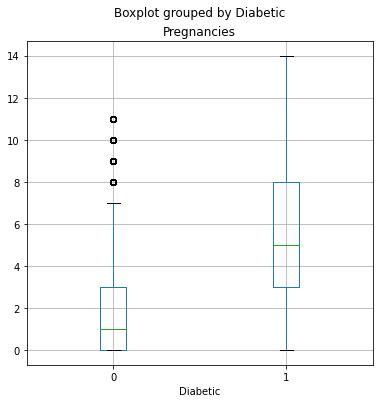

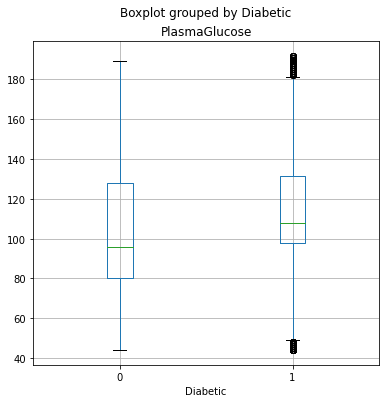

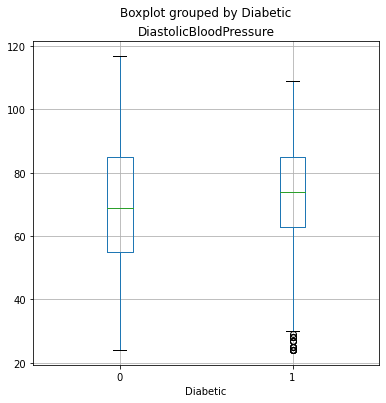

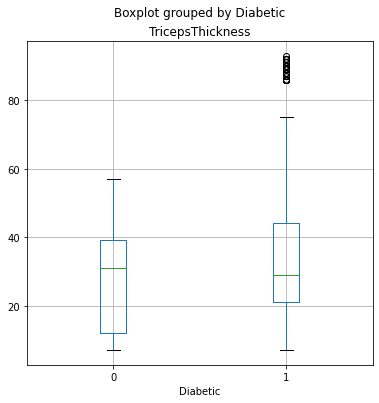

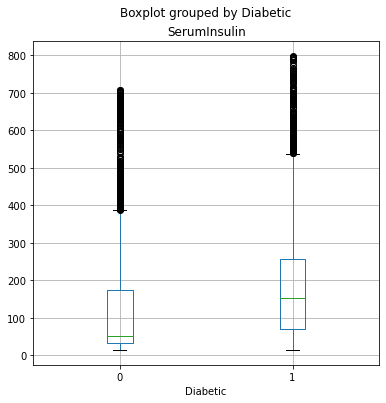

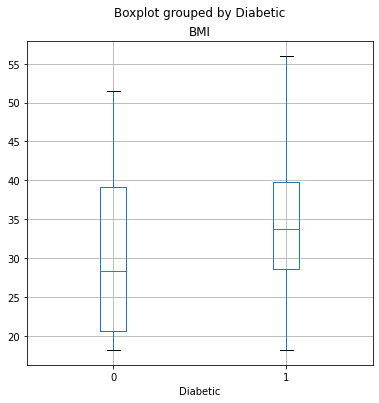

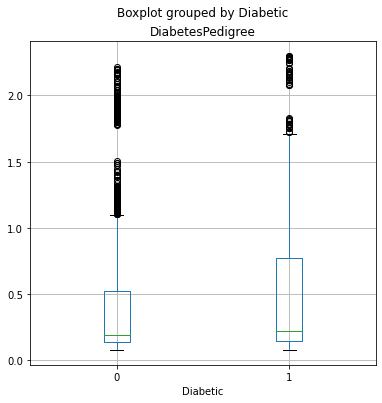

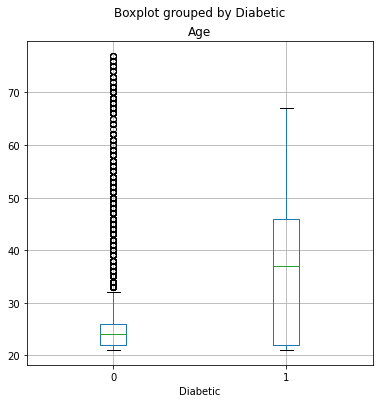

In [9]:
from matplotlib import pyplot as plt
%matplotlib inline
features = ['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure', 'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age']
for col in features:
    diabetes.boxplot(column=col, by='Diabetic', figsize=(6, 6))
    plt.title(col)
plt.show()

In [27]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

print("Training Sets: %d\nTest Sets: %d" % (x_train.size, x_test.size))

Training Sets: 84000
Test Sets: 36000


In [12]:
from sklearn.linear_model import LogisticRegression

reg = 0.01

model = LogisticRegression(C=1/reg, solver="liblinear").fit(x_train, y_train)
print(model)

LogisticRegression(C=100.0, solver='liblinear')


In [28]:
predictions = model.predict(x_test)
print('Prediction values:', predictions)
print('Actual values:    ', y_test)

Prediction values: [0 0 0 ... 0 1 0]
Actual values:     [0 0 1 ... 1 1 1]


In [29]:
from sklearn.metrics import accuracy_score

print('Accuracy :', accuracy_score(y_test, predictions))

Accuracy : 0.7888888888888889


In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85      2986
           1       0.72      0.60      0.66      1514

    accuracy                           0.79      4500
   macro avg       0.77      0.74      0.75      4500
weighted avg       0.78      0.79      0.78      4500



In [19]:
from sklearn.metrics import precision_score, recall_score

print('Overall Precision :', precision_score(y_test, predictions))
print('Overall recall:    ', recall_score(y_test, predictions))

Overall Precision : 0.7231012658227848
Overall recall:     0.6036988110964333


In [31]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)
print(cm)

[[2636  350]
 [ 600  914]]


In [32]:
y_score = model.predict_proba(x_test)
print(y_score)

[[0.81673901 0.18326099]
 [0.9631828  0.0368172 ]
 [0.8090146  0.1909854 ]
 ...
 [0.60687816 0.39312184]
 [0.10607349 0.89392651]
 [0.63833717 0.36166283]]


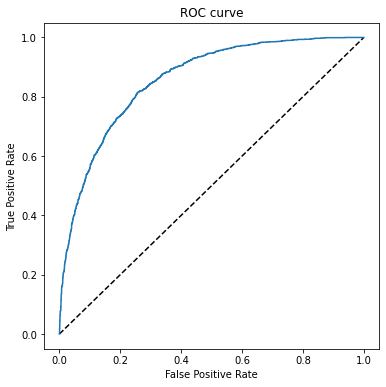

In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import matplotlib 
import matplotlib.pyplot as plt

%matplotlib inline

fpr, tpr, thresholds = roc_curve(y_test, y_score[:,1])

fig = plt.figure(figsize=(6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [37]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_score[:,1])
print(auc)

0.8568294489210326


In [43]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
import numpy as np

numeric_feature = [0, 1, 2, 3, 4, 5, 6]
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_features = [7]
categorical_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_feature),
        ('cat', categorical_transformer, categorical_features)])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('logregressor', LogisticRegression(C=1/reg, solver="liblinear"))])

model = pipeline.fit(x_train, (y_train))
print(model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [7])])),
                ('logregressor',
                 LogisticRegression(C=100.0, solver='liblinear'))])


Confusion Matrix:
 [[2667  319]
 [ 406 1108]] 

Accuracy : 0.8388888888888889
Overall Precision: 0.7764540995094604
Overall Recall: 0.7318361955085865
AUC:0.9202442751333613


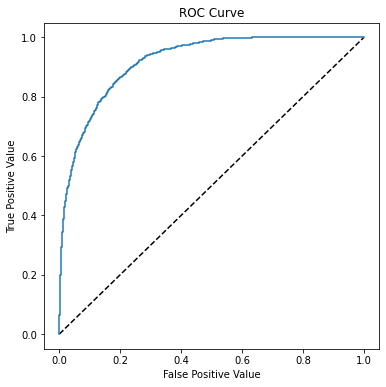

In [45]:
predictions = model.predict(x_test)

cm = confusion_matrix(y_test, predictions)
print('Confusion Matrix:\n',cm, '\n')
print('Accuracy :', accuracy_score(y_test, predictions))
print('Overall Precision:', precision_score(y_test, predictions))
print('Overall Recall:', recall_score(y_test, predictions))
auc = roc_auc_score(y_test, y_score[:,1])
print('AUC:'+str(auc))

y_score = model.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score[:,1])

fig = plt.figure(figsize=(6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Value')
plt.ylabel('True Positive Value')
plt.title('ROC Curve')
plt.show()

In [47]:
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('logregressor', RandomForestClassifier(n_estimators=100))])

model = pipeline.fit(x_train, (y_train))
print(model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [7])])),
                ('logregressor', RandomForestClassifier())])


confusion Matrix:
 [[2856  130]
 [ 172 1342]] 

Accuracy:  0.9328888888888889
Overall Precision: 0.9116847826086957
Overall recall: 0.8863936591809776

AUC:0.9819843992351802


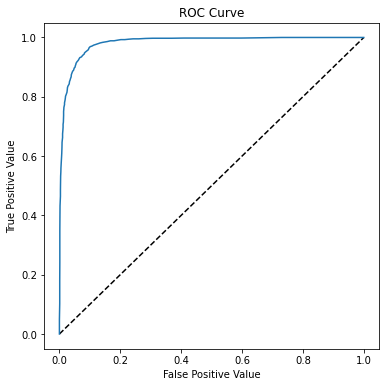

In [49]:
predictions = model.predict(x_test)
cm = confusion_matrix(y_test, predictions)
print('confusion Matrix:\n', cm, '\n')
print('Accuracy: ', accuracy_score(y_test, predictions))
print('Overall Precision:', precision_score(y_test, predictions))
print('Overall recall:', recall_score(y_test, predictions))
auc = roc_auc_score(y_test, y_score[:,1])
print('\nAUC:'+str(auc))

y_score= model.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score[:,1])

fig = plt.figure(figsize=(6, 6))
plt.plot([0, 1], [0, 1], 'k--')

plt.plot(fpr, tpr)
plt.xlabel('False Positive Value')
plt.ylabel('True Positive Value')
plt.title('ROC Curve')
plt.show()